In [64]:
import pandas as pd 
import numpy as np
import re
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.patches as mpatches
import scipy
from scipy import linalg
from matplotlib import pyplot
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from scipy.stats import pearsonr
import math
from matplotlib import cm
import seaborn as sns
from matplotlib.colors import Normalize


## Import Raw Data

In [399]:
rawdata = pd.read_csv(r'C:\Users\Student\Desktop\usedcar\usedcar_rawdata.csv')
rawdata = rawdata.drop(columns=['Unnamed: 0'])

In [403]:
rawdata.to_csv(r'C:\Users\Student\Desktop\usedcar\usedcar_rawdata.csv')

## Initial Review

In [404]:
rawdata

,Title,Make,Price,Mileage,Location,BodyStyle,Certified,MPG_city,MPG_highway,Model,...,Exterior,Interior,DriveType,Accident Report,Seating,VIN,DoorCount,OptionCount,Engine,Features
0,"2007 Chevrolet Tahoe - $11,999",Chevrolet,11999.0,129280.0,"Garland, TX",suv,NaN,NaN,NaN,Tahoe,...,Gold,NaN,NaN,0.0,NaN,1GNFC13J47R120389,NaN,0,V8,NaN
1,"2005 Chevrolet Express - $11,995",Chevrolet,11995.0,118113.0,"Claremont, NH",van,NaN,NaN,NaN,Express,...,White,NaN,NaN,1.0,NaN,1GBJG31U251136588,NaN,0,NaN,NaN
2,2010 Chevrolet Silverado 2500HD Work Truck Ext...,Chevrolet,15900.0,144000.0,"Frankfort, KY",pickup_truck,NaN,NaN,NaN,Silverado 2500HD,...,White,Gray,Four-Wheel Drive,0.0,6 seats,1GC5KVBG7AZ218246,4 doors,2,V8,"Steel Wheels,Tow Package"
3,2014 Chevrolet Corvette Stingray 3LT Coupe RWD...,Chevrolet,49995.0,2500.0,"Lewistown, MT",coupe,NaN,17 MPG City,29 MPG Highway,Corvette,...,Red,Black,Rear-Wheel Drive,0.0,2 seats,1G1YE2D73E5104797,2 doors,5,V8,"Bluetooth,Backup Camera,Aluminum Wheels,Naviga..."
4,"2002 Chevrolet Monte Carlo SS FWD - $3,440",Chevrolet,3440.0,174000.0,"Delavan, IL",coupe,NaN,17 MPG City,27 MPG Highway,Monte Carlo,...,Black,Black,Front-Wheel Drive,0.0,5 seats,2G1WX15K829249749,2 doors,2,V6,"Leather Seats,Aluminum Wheels"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2375345,"2012 FIAT 500 Lounge Convertible - $15,100",FIAT,15100.0,NaN,"Eynon, PA",convertible,NaN,NaN,NaN,500,...,Orange,Avorio (Ivory),Front-Wheel Drive,0.0,4 seats,3C3CFFER3CT310225,2 doors,0,I4,NaN
2375346,2013 FIAT 500 Sport,FIAT,NaN,NaN,"Eynon, PA",hatchback,NaN,31 MPG City,40 MPG Highway,500,...,Black,Black,Front-Wheel Drive,0.0,4 seats,3C3CFFBR8DT515920,2 doors,0,I4,NaN
2375347,2012 FIAT 500 Lounge,FIAT,NaN,NaN,"Eynon, PA",hatchback,NaN,27 MPG City,34 MPG Highway,500,...,Argento (Silver),Black,Front-Wheel Drive,0.0,4 seats,3C3CFFCR5CT310469,2 doors,5,I4,"Leather Seats,Sunroof/Moonroof,Alloy Wheels,Bl..."
2375348,2013 FIAT 500 Lounge,FIAT,NaN,NaN,"Eynon, PA",hatchback,NaN,31 MPG City,40 MPG Highway,500,...,Rosso (Red),Avorio (Ivory),Front-Wheel Drive,0.0,4 seats,3C3CFFCR1DT693120,2 doors,0,I4,NaN


In [405]:
percentage = round(rawdata['BodyStyle'].value_counts()/rawdata.shape[0],4)*100

In [406]:
percentage = round(brand_marketshare['Title']/brand_marketshare['Title'].sum(),4)*100
percentage = percentage.apply(lambda x:'%.2f'%x)+'%'

In [407]:
rawdata.head()

,Title,Make,Price,Mileage,Location,BodyStyle,Certified,MPG_city,MPG_highway,Model,...,Exterior,Interior,DriveType,Accident Report,Seating,VIN,DoorCount,OptionCount,Engine,Features
0,"2007 Chevrolet Tahoe - $11,999",Chevrolet,11999.0,129280.0,"Garland, TX",suv,NaN,NaN,NaN,Tahoe,...,Gold,NaN,NaN,0.0,NaN,1GNFC13J47R120389,NaN,0,V8,NaN
1,"2005 Chevrolet Express - $11,995",Chevrolet,11995.0,118113.0,"Claremont, NH",van,NaN,NaN,NaN,Express,...,White,NaN,NaN,1.0,NaN,1GBJG31U251136588,NaN,0,NaN,NaN
2,2010 Chevrolet Silverado 2500HD Work Truck Ext...,Chevrolet,15900.0,144000.0,"Frankfort, KY",pickup_truck,NaN,NaN,NaN,Silverado 2500HD,...,White,Gray,Four-Wheel Drive,0.0,6 seats,1GC5KVBG7AZ218246,4 doors,2,V8,"Steel Wheels,Tow Package"
3,2014 Chevrolet Corvette Stingray 3LT Coupe RWD...,Chevrolet,49995.0,2500.0,"Lewistown, MT",coupe,NaN,17 MPG City,29 MPG Highway,Corvette,...,Red,Black,Rear-Wheel Drive,0.0,2 seats,1G1YE2D73E5104797,2 doors,5,V8,"Bluetooth,Backup Camera,Aluminum Wheels,Naviga..."
4,"2002 Chevrolet Monte Carlo SS FWD - $3,440",Chevrolet,3440.0,174000.0,"Delavan, IL",coupe,NaN,17 MPG City,27 MPG Highway,Monte Carlo,...,Black,Black,Front-Wheel Drive,0.0,5 seats,2G1WX15K829249749,2 doors,2,V6,"Leather Seats,Aluminum Wheels"


In [408]:
rawdata.columns

Index(['Title', 'Make', 'Price', 'Mileage', 'Location', 'BodyStyle',
       'Certified', 'MPG_city', 'MPG_highway', 'Model', 'Trim', 'Rental',
       'Transmission', 'OwnershipHistory', 'FuelType', 'Exterior', 'Interior',
       'DriveType', 'Accident Report', 'Seating', 'VIN', 'DoorCount',
       'OptionCount', 'Engine', 'Features'],
      dtype='object')

In [409]:
rawdata.describe()

,Price,Mileage,OwnershipHistory,Accident Report,OptionCount
count,2.247208e+06,2.339351e+06,2.304644e+06,2.343021e+06,2.375350e+06
mean,2.075144e+04,6.395459e+04,1.645522e+00,2.043038e-01,3.683289e+00
std,1.877066e+04,5.008891e+04,1.024763e+00,4.963621e-01,3.118477e+00
min,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,1.199300e+04,2.709700e+04,1.000000e+00,0.000000e+00,1.000000e+00
50%,1.789500e+04,4.705000e+04,1.000000e+00,0.000000e+00,3.000000e+00
75%,2.599900e+04,9.217600e+04,2.000000e+00,0.000000e+00,5.000000e+00
max,3.838600e+06,2.400000e+06,1.900000e+01,8.000000e+00,6.400000e+01


In [410]:
rawdata.isnull().sum()

Title                     0
Make                      0
Price                128142
Mileage               35999
Location                  0
BodyStyle              3245
Certified           2130888
MPG_city             468531
MPG_highway          468531
Model                     0
Trim                 110407
Rental              1971633
Transmission          43703
OwnershipHistory      70706
FuelType              56003
Exterior              57451
Interior             414585
DriveType            115321
Accident Report       32329
Seating              115232
VIN                    2239
DoorCount           1139822
OptionCount               0
Engine                60814
Features             310832
dtype: int64

## Data Cleaning


In [411]:
car_dataframe = rawdata.copy()

The title column and the Location column contains multiple values that need to be split into multiple columns

In [412]:
#Split Location column into two columns called Location & State separately
Location_split = car_dataframe['Location'].str.split(', ', n=1, expand=True)
car_dataframe.drop(columns=['Location'], inplace=True)
car_dataframe.insert(2,'Location',Location_split[0])
car_dataframe.insert(3,'State',Location_split[1])
car_dataframe=car_dataframe.reset_index(drop=True)
car_dataframe.drop(car_dataframe[car_dataframe.State=='California'].index, inplace=True)

#Title split into Year and Title columns
Title_split = car_dataframe['Title'].str.split(' -', n=1, expand=True)
car_dataframe.drop(columns=['Title'], inplace=True)
car_dataframe.insert(0,'Title',Title_split[0])
brand_year_split = car_dataframe['Title'].str.split(r'^(\d{4})', n=1, expand=True)
car_dataframe.drop(columns=['Title'], inplace=True)
car_dataframe.insert(0, 'Title', brand_year_split[2])
car_dataframe.insert(1, 'Year', brand_year_split[1])
car_dataframe['Year'] = car_dataframe['Year'].astype(int)

In [413]:
#the data prior to 2000 are obsolete
car_dataframe[car_dataframe['Year']<2000].isnull().sum()

Title                   0
Year                    0
Make                    0
Location                0
State                   0
Price                2916
Mileage              3843
BodyStyle            1243
Certified           30559
MPG_city            21332
MPG_highway         21332
Model                   0
Trim                 9808
Rental              30088
Transmission         2528
OwnershipHistory     9981
FuelType            10079
Exterior             2322
Interior             7911
DriveType           12566
Accident Report      9640
Seating             12679
VIN                   281
DoorCount           13528
OptionCount             0
Engine              10327
Features            20140
dtype: int64

In [414]:
car_dataframe = car_dataframe.drop(car_dataframe[car_dataframe['Year']<2000].index)

Take a closer look at the pearson method on the table.

In [415]:
car_dataframe.corr(method='pearson')

,Year,Price,Mileage,OwnershipHistory,Accident Report,OptionCount
Year,1.000000,0.361953,-0.776629,-0.587049,-0.218918,0.239095
Price,0.361953,1.000000,-0.392143,-0.224025,-0.139160,0.241135
Mileage,-0.776629,-0.392143,1.000000,0.510478,0.221252,-0.212296
OwnershipHistory,-0.587049,-0.224025,0.510478,1.000000,0.194943,-0.158414
Accident Report,-0.218918,-0.139160,0.221252,0.194943,1.000000,-0.077089
OptionCount,0.239095,0.241135,-0.212296,-0.158414,-0.077089,1.000000


In [416]:
#Unnecessary columns or columns with too many NA values
car_dataframe = car_dataframe.drop(columns='Rental')
car_dataframe = car_dataframe.drop(columns='VIN')
car_dataframe = car_dataframe.drop(columns='Certified')
car_dataframe = car_dataframe.drop(columns='Exterior')
car_dataframe = car_dataframe.drop(columns='Interior')
car_dataframe = car_dataframe.drop(columns='Trim')
car_dataframe = car_dataframe.drop(columns='Features')
car_dataframe = car_dataframe.drop(columns='DoorCount')

In [418]:
#drop the low relevent columns with price
car_dataframe = car_dataframe.drop(columns='Seating')

In [419]:
#Drop all of the missing values of all columns except gasmileage columns
car_dataframe = car_dataframe.drop(car_dataframe[car_dataframe['Transmission'].isna()].index)
car_dataframe = car_dataframe.drop(car_dataframe[car_dataframe['FuelType'].isna()].index)
car_dataframe = car_dataframe.drop(car_dataframe[car_dataframe['BodyStyle'].isna()].index)
car_dataframe = car_dataframe.drop(car_dataframe[car_dataframe['Accident Report'].isna()].index)
car_dataframe = car_dataframe.drop(car_dataframe[car_dataframe['OwnershipHistory'].isna()].index)
car_dataframe = car_dataframe.drop(car_dataframe[car_dataframe['Engine'].isna()].index)
car_dataframe = car_dataframe.drop(car_dataframe[car_dataframe['DriveType'].isna()].index)
car_dataframe = car_dataframe.drop(car_dataframe[car_dataframe['Price'].isna()].index)
car_dataframe = car_dataframe.drop(car_dataframe[car_dataframe['Mileage'].isna()].index)

car_dataframe = car_dataframe.reset_index(drop=True)

In [420]:
#convert the dtype of gasmileage columns to float
car_dataframe['MPG_city'] = car_dataframe['MPG_city'].str.extract(r'^(\d*)').astype(float)
car_dataframe['MPG_highway'] = car_dataframe['MPG_highway'].str.extract(r'^(\d*)').astype(float)


In [421]:
nan_mileage = set()
for i in car_dataframe['Model'].unique():
    if all(car_dataframe[car_dataframe['Model']==i]['MPG_city'].isna()):
        nan_mileage.add(i)
    if all(car_dataframe[car_dataframe['Model']==i]['MPG_highway'].isna()):
        nan_mileage.add(i)

In [422]:
car_dataframe = car_dataframe.drop(car_dataframe[car_dataframe['Model'].isin(nan_mileage)].index)

In [423]:
car_dataframe.isnull().sum()

Title                    0
Year                     0
Make                     0
Location                 0
State                    0
Price                    0
Mileage                  0
BodyStyle                0
MPG_city            212280
MPG_highway         212280
Model                    0
Transmission             0
OwnershipHistory         0
FuelType                 0
DriveType                0
Accident Report          0
OptionCount              0
Engine                   0
dtype: int64

In [395]:
#Impute the missing values of each model with the average fuel efficiency of each model
for i in car_dataframe[car_dataframe['MPG_highway'].isna()]['Model'].unique():   
    car_dataframe.loc[car_dataframe[(car_dataframe['Model']==i)&(car_dataframe['MPG_city'].isna())].index, 'MPG_city'] = car_dataframe[car_dataframe['Model']==i]['MPG_city'].mean()
    car_dataframe.loc[car_dataframe[(car_dataframe['Model']==i)&(car_dataframe['MPG_highway'].isna())].index, 'MPG_highway'] = car_dataframe[car_dataframe['Model']==i]['MPG_highway'].mean()

Even though the missing values are all imputed, we still have the problem of various values of fuel efficiency given that the same car model we checked out.
Thus, the values of gas mileage columns must be adjusted to average value of each model's fuel efficiency.

In [424]:
for i in car_dataframe['Model'].unique():
    car_dataframe.loc[car_dataframe[car_dataframe['Model']==i].index, 'MPG_city'] = car_dataframe[car_dataframe['Model']==i]['MPG_city'].mean()
    car_dataframe.loc[car_dataframe[car_dataframe['Model']==i].index, 'MPG_highway'] = car_dataframe[car_dataframe['Model']==i]['MPG_highway'].mean()

Then, check the distribution of each column if there's any significant outlier.

In [425]:
car_dataframe.groupby('State').mean()

,Year,Price,Mileage,MPG_city,MPG_highway,OwnershipHistory,Accident Report,OptionCount
State,,,,,,,,
AL,2014.871642,20329.356906,66914.991624,19.929324,27.179338,1.644329,0.256786,3.836850
AR,2015.447140,22490.777172,60690.498594,19.081301,26.041031,1.538084,0.135338,3.814972
AZ,2014.464508,18547.731591,63419.945770,20.767729,28.190493,1.764169,0.161113,3.480078
CA,2014.901386,21051.277221,56464.145384,21.602773,28.951375,1.535506,0.122972,3.855477
CO,2014.436779,20607.998376,64692.488986,20.270486,27.260999,1.682824,0.182307,3.794630
CT,2014.554050,19520.242378,57912.919852,20.993812,28.357893,1.470037,0.233730,4.140543
DC,2010.156250,15118.531250,132984.218750,20.617556,27.888081,3.062500,0.250000,4.093750
DE,2014.553768,19729.124682,60828.906647,20.742739,28.155724,1.494073,0.135690,3.625106
FL,2015.075761,20469.344071,54502.063827,20.793117,28.247307,1.635560,0.312319,3.659585


As we can see the mileage record in DC showed relatively higher than the others.

In [426]:
car_dataframe[(car_dataframe['State']=='DC')&(car_dataframe['Mileage']>150000)]

,Title,Year,Make,Location,State,Price,Mileage,BodyStyle,MPG_city,MPG_highway,Model,Transmission,OwnershipHistory,FuelType,DriveType,Accident Report,OptionCount,Engine
797744,Cadillac CTS 3.6L RWD,2005,Cadillac,Washington,DC,1000.0,1675000.0,sedan,18.650872,27.471151,CTS,Automatic,5.0,Gasoline,Rear-Wheel Drive,1.0,1,V6
1154612,BMW X3 2.5i AWD,2004,BMW,Washington,DC,2900.0,163000.0,crossover,20.538226,27.475626,X3,Automatic,3.0,Gasoline,All-Wheel Drive,1.0,4,I6


Considering there might be other mileage outliers, we'll remove all of them at once.

In [427]:
car_dataframe = car_dataframe.drop(car_dataframe[car_dataframe['Mileage']>150000].index)

Price outliers are left to be removed

In [428]:
#Drop the outliers with price over three hundred thousand
car_dataframe = car_dataframe.drop(car_dataframe[car_dataframe['Price'] > 300000].index)
car_dataframe = car_dataframe.reset_index(drop=True)

In [429]:
#Remove the outliers in each model with price over or lower than three times of each model's price deviation
for value in car_dataframe['Model'].unique():
    price = car_dataframe[car_dataframe['Model']==value]['Price']
    price_index = price[((price-price.mean())/price.std() > 3) | ((price-price.mean())/price.std() < -3)].index
    car_dataframe = car_dataframe.drop(price_index)
car_dataframe = car_dataframe.reset_index(drop=True)

## Exploratory Data Analysis

In [448]:
car_dataframe = pd.read_csv(r'C:/Users/Student/Desktop/usedcar/sorted_result.csv')

First step, we are about to check the marketshare of each car brand and its median price

In [454]:
brand_marketshare = car_dataframe.groupby('Make')['Title'].count()
brand_marketshare = brand_marketshare.reset_index()
percentage = round(brand_marketshare['Title']/brand_marketshare['Title'].sum(),4)*100
percentage_string = percentage.apply(lambda x:'%.2f'%x)+'%'
brand_marketshare['Percentage'] = percentage
brand_marketshare['Percentage_string'] = percentage_string
brand_price = car_dataframe.groupby('Make')['Price'].mean()
brand_price = brand_price.reset_index()
brand_marketshare = pd.merge(brand_marketshare, brand_price, on='Make')
brand_marketshare = brand_marketshare.sort_values(by=['Title'], ascending=True)
brand_marketshare['Price'] = round(brand_marketshare['Price'],0).astype(int)
brand_marketshare

,Make,Title,Percentage,Percentage_string,Price
37,Plymouth,32,0.00,0.00%,28233
42,SRT,32,0.00,0.00%,88937
20,Isuzu,70,0.00,0.00%,5199
36,Oldsmobile,137,0.01,0.01%,3256
31,McLaren,243,0.01,0.01%,158215
51,smart,402,0.02,0.02%,6784
41,Rolls-Royce,407,0.02,0.02%,179908
24,Lamborghini,469,0.03,0.03%,185351
2,Aston Martin,485,0.03,0.03%,87146
17,Hummer,510,0.03,0.03%,11733


In [455]:
brand_marketshare= brand_marketshare.sort_values(by='Percentage', ascending=False)

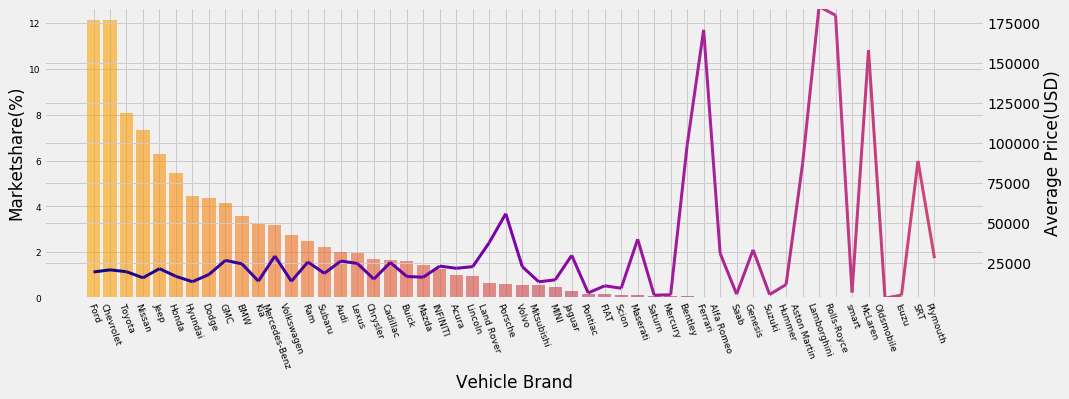

In [456]:
fig, ax1 = plt.subplots(figsize=(15,5))
Vehicle_Count = brand_marketshare['Percentage']
Vehicle_Cost = brand_marketshare['Price']

np_idx = np.flip(np.linspace(0.3,0.8,52),0)
ax1.bar(brand_marketshare.Make, Vehicle_Count, alpha=0.6,color=plt.cm.inferno(np_idx), linewidth=2, label='Marketshare')
ax = plt.gca().set_xticklabels(brand_marketshare['Make'], rotation=-70)

ax1.tick_params(labelsize=9)
ax2=ax1.twinx()
x=np.arange(52)
points=np.array([x,Vehicle_Cost]).T.reshape(-1,1,2)
segments=np.concatenate([points[:-1], points[1:]], axis=1)
lnct = LineCollection(segments, cmap='plasma',norm=plt.Normalize(0, 100))
lnct.set_linewidth(3)
lnct.set_array(x)
ax2.add_collection(lnct)
plt.ylim(min(Vehicle_Cost), max(Vehicle_Cost))

#ax2.autoscale_view()
#ax2.axes.set_yticklabels(Vehicle_Cost)
#ax2.grid(b=False)

#ax2.tick_params(labelsize=9)
ax2.set_ylabel('Average Price(USD)')
#ax1.legend(loc='upper left')
#black_patch = mpatches.Patch(alpha=1, label='MarketShare', color=plt.cm.inferno(np_idx))
#gray_patch = mpatches.Patch(alpha=0, label='Average Price(USD)')
#first_legend = plt.legend(handles=[black_patch], loc=0)
#ax = plt.gca().add_artist(first_legend)
#plt.legend(handles=[gray_patch], loc=2)
ax1.set_ylabel('Marketshare(%)')
ax1.set_xlabel('Vehicle Brand')
plt.show()


We set the bar chart as the marketshare and the line chart as the average price.

As we can find out that the brands with quite low marketshare tend to be at the high level of volatile price range at which are not easy to be dealt with machine learning. The strategy could be removing the brands with extreme low marketshare.
Here i set the threshold for marketshare must be more than 1% for removing the unqualified brands.

In [457]:
brand_marketshare = brand_marketshare.reset_index(drop=True)
brand_marketshare

,Make,Title,Percentage,Percentage_string,Price
0,Ford,220723,12.11,12.11%,19592
1,Chevrolet,220679,12.11,12.11%,20911
2,Toyota,147321,8.08,8.08%,19780
3,Nissan,133564,7.33,7.33%,15973
4,Jeep,114374,6.28,6.28%,21678
5,Honda,99444,5.46,5.46%,16868
6,Hyundai,81364,4.46,4.46%,13536
7,Dodge,79316,4.35,4.35%,18023
8,GMC,75682,4.15,4.15%,26831
9,BMW,64986,3.57,3.57%,24702


In [461]:
car_dataframe = car_dataframe[car_dataframe['Make'].isin(list(brand_marketshare['Make'][:23]))]

Then, it's time to check the price outliers.
But the dataset must be sorted before detecting any possible outlier.  
Here I sort it by the column of Model and visualize it by the top 50 models with box plot.

In [462]:
Top_ten=rawdata[rawdata['Model'].isin(rawdata['Model'].value_counts()[0:50].index)]

In [463]:
Top_ten

,Title,Make,Price,Mileage,Location,BodyStyle,Certified,MPG_city,MPG_highway,Model,...,Exterior,Interior,DriveType,Accident Report,Seating,VIN,DoorCount,OptionCount,Engine,Features
0,"2007 Chevrolet Tahoe - $11,999",Chevrolet,11999.0,129280.0,"Garland, TX",suv,NaN,NaN,NaN,Tahoe,...,Gold,NaN,NaN,0.0,NaN,1GNFC13J47R120389,NaN,0,V8,NaN
2,2010 Chevrolet Silverado 2500HD Work Truck Ext...,Chevrolet,15900.0,144000.0,"Frankfort, KY",pickup_truck,NaN,NaN,NaN,Silverado 2500HD,...,White,Gray,Four-Wheel Drive,0.0,6 seats,1GC5KVBG7AZ218246,4 doors,2,V8,"Steel Wheels,Tow Package"
7,2001 Chevrolet Silverado 1500 LT Extended Cab ...,Chevrolet,6550.0,188583.0,"Delavan, IL",pickup_truck,NaN,14 MPG City,18 MPG Highway,Silverado 1500,...,Med Charcoal Gray Met,Graphite,Rear-Wheel Drive,0.0,5 seats,2GCEC19T811120148,4 doors,3,V8,"Leather Seats,Suspension Package,Aluminum Wheels"
8,"2009 Chevrolet Equinox 2LT FWD - $9,960",Chevrolet,9960.0,80124.0,"Delavan, IL",crossover,NaN,17 MPG City,24 MPG Highway,Equinox,...,Black Granite Metallic,NaN,Front-Wheel Drive,0.0,5 seats,2CNDL53FX96200566,4 doors,4,V6,"Leather Seats,Chrome Wheels,Bluetooth,Remote S..."
9,2004 Chevrolet Silverado 1500 LS Extended Cab ...,Chevrolet,9220.0,103000.0,"Delavan, IL",pickup_truck,NaN,14 MPG City,18 MPG Highway,Silverado 1500,...,Sandstone Metallic,NaN,Rear-Wheel Drive,0.0,6 seats,2GCEC19TX41399042,4 doors,4,V8,"Power Package,Suspension Package,Chrome Wheels..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2341201,2017 Toyota Tacoma,Toyota,NaN,34951.0,"Hickory, NC",pickup_truck,NaN,NaN,NaN,Tacoma,...,NaN,NaN,NaN,NaN,NaN,3TMAZ5CN6HM030952,NaN,1,V6,Bluetooth
2341202,"1998 Toyota Camry LE - $3,318",Toyota,3318.0,154327.0,"Columbus, GA",sedan,NaN,20 MPG City,28 MPG Highway,Camry,...,Sunfire Red Pearl,Gray,Front-Wheel Drive,NaN,5 seats,JT2BG22K2W0145055,4 doors,1,I4,Steel Wheels
2341204,"2014 Toyota Corolla LE - $9,295",Toyota,9295.0,107850.0,"Miami, FL",sedan,NaN,29 MPG City,37 MPG Highway,Corolla,...,White,Other,Front-Wheel Drive,NaN,5 seats,2T1BURHE2EC040580,4 doors,1,I4,Bluetooth
2341208,"1998 Toyota Camry LE - $3,450",Toyota,3450.0,137268.0,"Yankton, SD",sedan,NaN,20 MPG City,28 MPG Highway,Camry,...,Black,NaN,Front-Wheel Drive,0.0,5 seats,4T1BG28K5WU223783,4 doors,1,I4,Steel Wheels


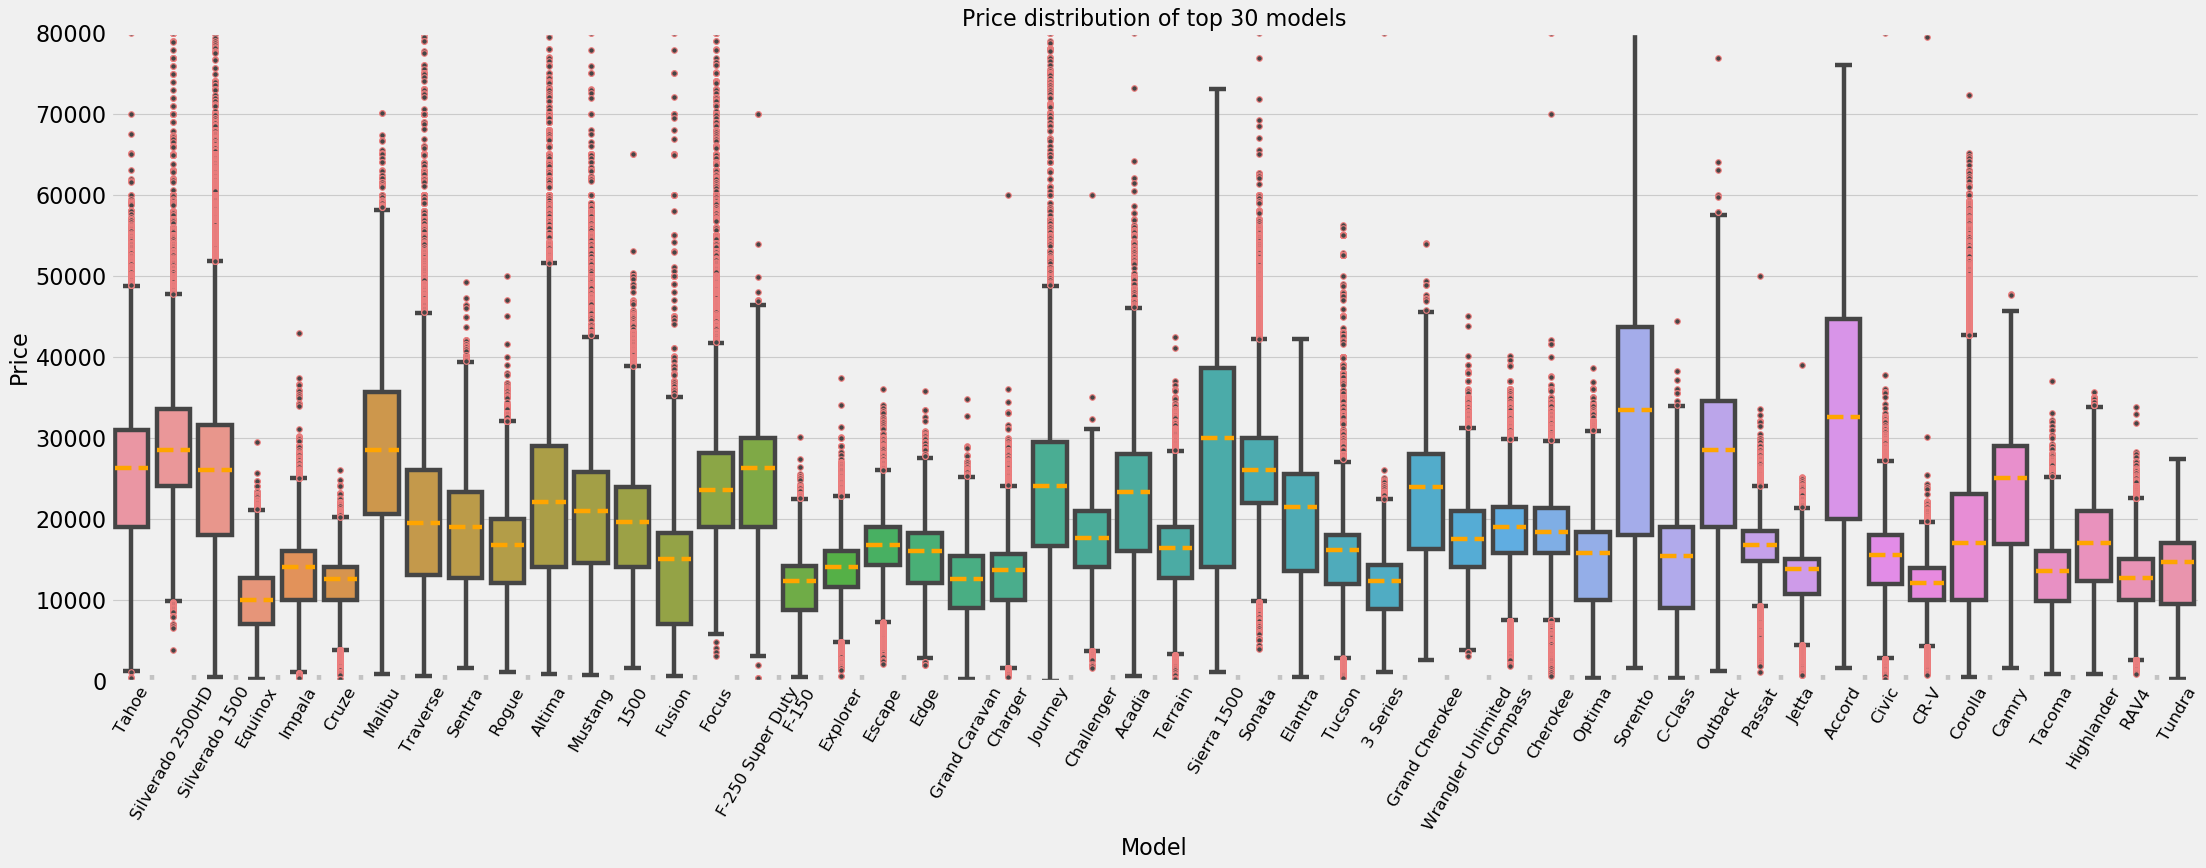

In [464]:
plt.figure(figsize=(30,10), dpi=80)
plt.ylim(0,80000)
plt.xticks(fontsize=15)
plt.yticks(fontsize=20)
sns.boxplot(x='Model', y='Price', data=Top_ten.sort_values('Price', ascending=False), medianprops={'linestyle':'--', 'color':'orange'}, labels=[''], fliersize=5, flierprops=dict(marker='o', markeredgecolor='lightcoral'))
for i in range(len(Top_ten['Model'].unique())-1):
    plt.vlines(i+.5, 30, 700, linestyles='solid', colors='grey', alpha=0.4)
plt.gca().set_xticklabels(Top_ten['Model'].unique(), rotation=60)
plt.xlabel('Model', fontsize=20)
plt.ylabel('Price', fontsize=20)
plt.title('Price distribution of top 30 models', fontsize=20)
plt.savefig('modelprice_boxplot.png')

All red outliers successfully emerged. Then, we remove all these red dots.

#### Comparison of State  Income &  Vehicle Cost

For the analysis of this subject we require to import the support data which contains the relative information of all the states in the U.S.

In [465]:
state_result = pd.read_csv(r'../Student/Desktop/usedcar/supportdata.csv')
state_result

,State,Median Household Income(USD),Income Ranking,Abbreviation,Price,Cost Ranking,Density,Pop,LandArea,Vehicle Count
0,District of Columbia,82604,1,DC,15996.43333,50,11665.0984,711571,61,30
1,New Jersey,79363,3,NJ,20129.29658,37,1213.2917,8922547,7354,56606
2,Massachusetts,77378,5,MA,20498.55510,30,889.6632,6939373,7800,45750
3,Connecticut,76106,7,CT,19728.15029,41,736.8589,3567871,4842,24745
4,Maryland,81868,2,MD,20735.48031,22,624.5923,6062917,9707,33186
5,Delaware,65627,15,DE,20040.93712,38,500.2735,975033,1949,4469
6,New York,65323,16,NY,21651.26752,11,413.6005,19491339,47126,72452
7,Florida,53267,37,FL,20459.35458,32,403.6579,21646155,53625,133991
8,Ohio,54533,34,OH,18650.85729,47,286.7910,11718568,40861,77793
9,Pennsylvania,59445,22,PA,20033.56861,39,286.3905,12813969,44743,77660


Price regression line as a favorable option for this plot.

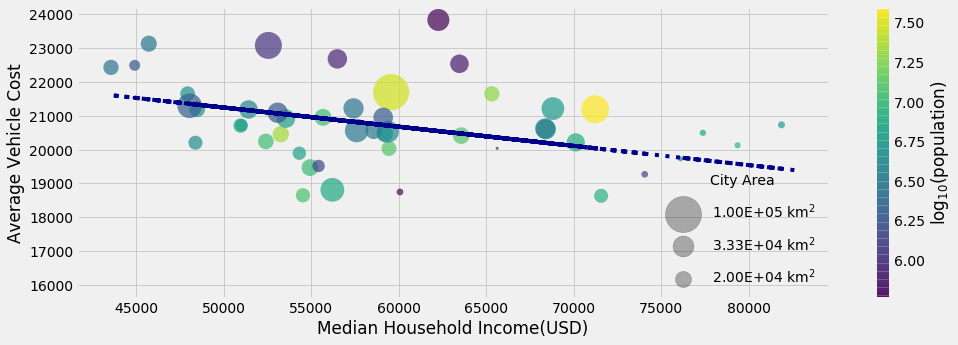

In [466]:
income_cost_fit = np.polyfit(state_result['Median Household Income(USD)'], state_result['Price'],1)
income_cost_fit
plt.style.use('fivethirtyeight')
Income, Cost = state_result['Median Household Income(USD)'], state_result['Price']
Population, Area = state_result['Pop'], state_result['LandArea']
fig, ax = plt.subplots(figsize=(15,5))
scatter = ax.scatter(Income, Cost, c=np.log10(Population), cmap='viridis', s=Area/50, linewidths=0, alpha=0.7, marker=".")

plt.plot(state_result['Median Household Income(USD)'], income_cost_fit[0]*state_result['Median Household Income(USD)']+income_cost_fit[1],
        linewidth=4, color ='darkblue', linestyle=':')
plt.xlabel('Median Household Income(USD)')
plt.ylabel('Average Vehicle Cost')
fig.colorbar(scatter, label='log$_{10}$(population)')

for area in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.3, s=Area/area,
                label=str(format(1/area*10000000, "9.2E")) + ' km$^2$')
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='City Area', loc='lower right')


The regression dotted line shows the negative relation with income and vehicle price. Interestingly to say, the support data indicates that the states with median household income around 75,000 or even higher are tend to be with low land area(compared to the others)and also with lower vehicle price. While the states with higher prices shows relatively low in median household income and population but quiet larger in land area.
Next step, we'll check how the distribution of these vehicles affected the regression line.

We divided the states in to three groups based on Q1 and Q3 of interquartile range.
The median price of each bodystyle in three groups are shown below and the price gap differentiated by three bars in each bodystyle group.

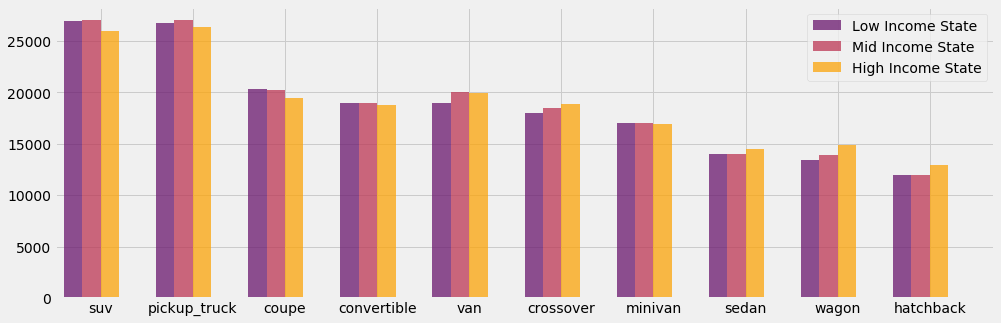

In [467]:
low_income_series = pd.Series(data=car_dataframe[car_dataframe['State'].isin(state_result[state_result['Median Household Income(USD)'] <= 55000]['Abbreviation'])].groupby('BodyStyle')['Price'].median(), name='Low Income State')
median_income_series = pd.Series(data=car_dataframe[car_dataframe['State'].isin(state_result[(state_result['Median Household Income(USD)']>55000)&(state_result['Median Household Income(USD)'] <= 65000)]['Abbreviation'])].groupby('BodyStyle')['Price'].median(), name='Median Income State')
high_income_series = pd.Series(data=car_dataframe[car_dataframe['State'].isin(state_result[state_result['Median Household Income(USD)'] > 65000]['Abbreviation'])].groupby('BodyStyle')['Price'].median(), name='High Income State')
state_income_bodystyle= pd.DataFrame(data=[low_income_series,median_income_series, high_income_series]).T
state_income_bodystyle = state_income_bodystyle.sort_values(by='Low Income State', ascending=False)
plt.style.use('fivethirtyeight')
width=0.2
pos=list(range(len(state_income_bodystyle.index)))
fig, ax = plt.subplots(figsize=(15,5))
ax.bar(pos, state_income_bodystyle['Low Income State'], width, alpha=0.75, color=plt.cm.inferno(0.3), label='Low Income State')
ax.bar([p+width for p in pos], state_income_bodystyle['Median Income State'], width, alpha=0.75, color=plt.cm.inferno(0.5))
ax.bar([p+width*2 for p in pos], state_income_bodystyle['High Income State'], width, alpha=0.75, color=plt.cm.inferno(0.8))
ax.set_xticks([p + 1.5*width for p in pos])
ax.set_xticklabels(state_income_bodystyle.index)
plt.xlim(min(pos)-width, max(pos)+1)
plt.legend(['Low Income State', 'Mid Income State', 'High Income State'])


The price gap in each group wasn't significant. So the average prices of three groups would be just fine.

Next, i'll demonstrate the marketshare of each bodystyle in each group by the line plots with the previous bodystyle index on x-axis. Here i add the barplot as the average prices of three gorups.

Text(0.5, 0, 'BodyStyle')

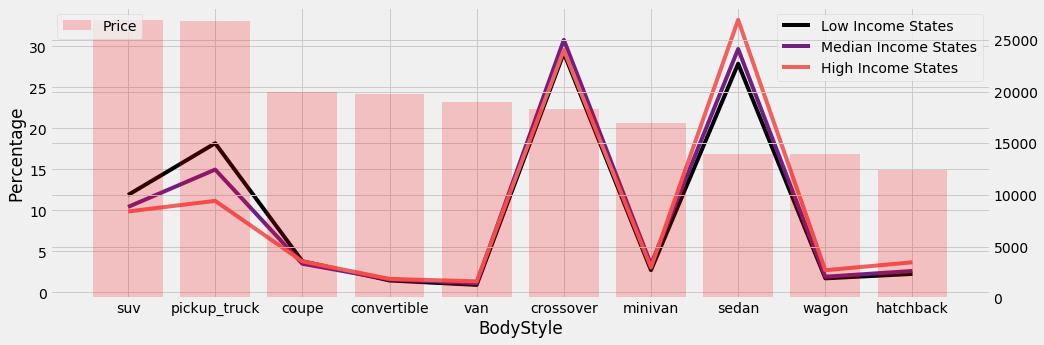

In [469]:
low_income_df = pd.Series(data=car_dataframe[car_dataframe['State'].isin(state_result[state_result['Median Household Income(USD)'] < state_result['Median Household Income(USD)'].quantile(.25)]['Abbreviation'])].groupby('BodyStyle')['Model'].count(), name='Low Income States')
median_income_df = pd.Series(data=car_dataframe[car_dataframe['State'].isin(state_result[(state_result['Median Household Income(USD)'] >= state_result['Median Household Income(USD)'].quantile(.25))&(state_result['Median Household Income(USD)'] <= state_result['Median Household Income(USD)'].quantile(.75))]['Abbreviation'])].groupby('BodyStyle')['Model'].count(), name='Median Income States')
high_income_df = pd.Series(data=car_dataframe[car_dataframe['State'].isin(state_result[state_result['Median Household Income(USD)'] > state_result['Median Household Income(USD)'].quantile(.75)]['Abbreviation'])].groupby('BodyStyle')['Model'].count(), name='High Income States')
state_model_count = pd.DataFrame(data=[low_income_df, median_income_df, high_income_df]).T
for colnum in state_model_count.columns:
    state_model_count[colnum] = round(state_model_count[colnum]/ state_model_count[colnum].sum()*100, 2)
state_model_count = state_model_count.loc[state_income_bodystyle.index]
fig, axes = plt.subplots(figsize=(15,5))
np_idx = np.linspace(0,1,4)
for i, num in zip(state_model_count.columns, np_idx):
    axes.plot(state_model_count.index, state_model_count[i], color=plt.cm.magma(num))
axes2 = plt.twinx()
axes2.bar(state_model_count.index, car_dataframe.groupby('BodyStyle')['Price'].median().sort_values(ascending=False), alpha=0.2, color='Red', label='Price')
axes2.legend(loc='upper left')
axes.legend(state_model_count.columns, loc='upper right')
axes.set_ylabel('Percentage')
axes.set_xlabel('BodyStyle')

The result indicateds that the vehicles with higher prices in bodystyle shows more percentage of vehicles in lower income states than the others, especially such as suv and pickup truck. Only the sedan type shows the obvious percentage gap between three groups but at quite low price ranking.
That's why lower median income group shows more average vehicle price than the others.